In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
from skimage import io
from IPython.display import display
import os
import random
import glob

C:\Users\dell\anaconda3\envs\segmentation\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
brain_df = pd.read_csv("C:/Users/dell/Downloads/Image/mri-segmentation/data.csv")

In [3]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [4]:
data_map = []
for sub_dir_path in glob.glob("C:/Users/dell/Downloads/Image/mri-segmentation/"+"*"):
    # print(sub_dir_path)
    try:
        dir_name = sub_dir_path.split('/')[-1][17:]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + '/' + filename
            data_map.extend([dir_name, image_path])
    except Exception as e:
        print(e)

[WinError 267] The directory name is invalid: 'C:/Users/dell/Downloads/Image/mri-segmentation\\data.csv'
[WinError 267] The directory name is invalid: 'C:/Users/dell/Downloads/Image/mri-segmentation\\README.md'


In [5]:
# There are two most common medical image extensions -> .tif & .dicom
data_map[0]

'TCGA_CS_4941_19960909'

In [6]:
df = pd.DataFrame({"patient_id" : [i[:] for i in data_map[::2]], 
                   "path" : data_map[1::2]})
df.head()

# Displays path to MRI Scan Image
df['path'][3]

'C:/Users/dell/Downloads/Image/mri-segmentation\\TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif'

In [7]:
# base length
BASE_LEN = len(df['path'][0])
BASE_LEN

96

In [8]:
import random
# Read images path from dataframe which doesnot contain "mask" in it
df_imgs = df[~df['path'].str.contains("mask")]
# Read images path from dataframe which contain "mask" in it
df_masks = df[df['path'].str.contains("mask")]

In [9]:
BASE_LEN = BASE_LEN
END_IMG_LEN = 4    # ".tif"
END_MASK_LEN = 9   # "_mask.tif"

In [10]:
# Data Sorting
imgs = sorted(df_imgs["path"].values, key = lambda x : (x[BASE_LEN:-END_IMG_LEN]))
masks = sorted(df_masks["path"].values, key = lambda x : (x[BASE_LEN:-END_MASK_LEN]))

In [11]:
# Sorting Check
idx = random.randint(0, len(imgs)-1)
print("Path to the image:", imgs[idx], "\nPath to the Mask:", masks[idx])

Path to the image: C:/Users/dell/Downloads/Image/mri-segmentation\TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_2.tif 
Path to the Mask: C:/Users/dell/Downloads/Image/mri-segmentation\TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_20_mask.tif


In [12]:
import cv2

brain_df = pd.DataFrame({'patient_id': df_imgs.patient_id.values,
                         'image_path' : imgs,
                          'mask_path' : masks
                        })


In [13]:
# Label mask images as 1
def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0:
        return 1
    else:
        return 0

In [14]:
brain_df['mask'] = brain_df['mask_path'].apply(lambda x : pos_neg_diagnosis(x))
brain_df

,patient_id,image_path,mask_path,mask
0,TCGA_CS_4941_19960909,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,0
1,TCGA_CS_4941_19960909,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,1
2,TCGA_CS_4941_19960909,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,1
3,TCGA_CS_4941_19960909,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,1
4,TCGA_CS_4941_19960909,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,1
...,...,...,...,...
3924,TCGA_HT_A61B_19991127,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,0
3925,TCGA_HT_A61B_19991127,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,0
3926,TCGA_HT_A61B_19991127,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,0
3927,TCGA_HT_A61B_19991127,C:/Users/dell/Downloads/Image/mri-segmentation...,C:/Users/dell/Downloads/Image/mri-segmentation...,0


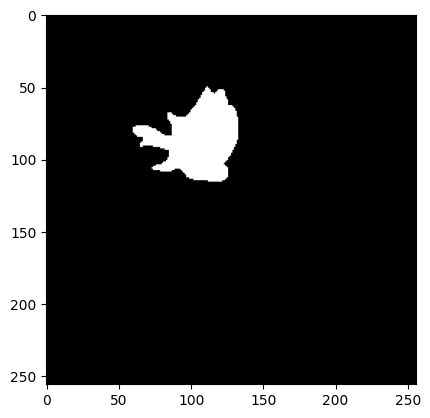

In [15]:
plt.imshow(cv2.imread(brain_df.mask_path[2]))

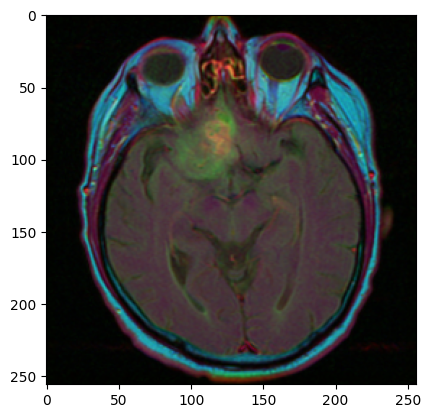

In [16]:
plt.imshow(cv2.imread(brain_df.image_path[2]))

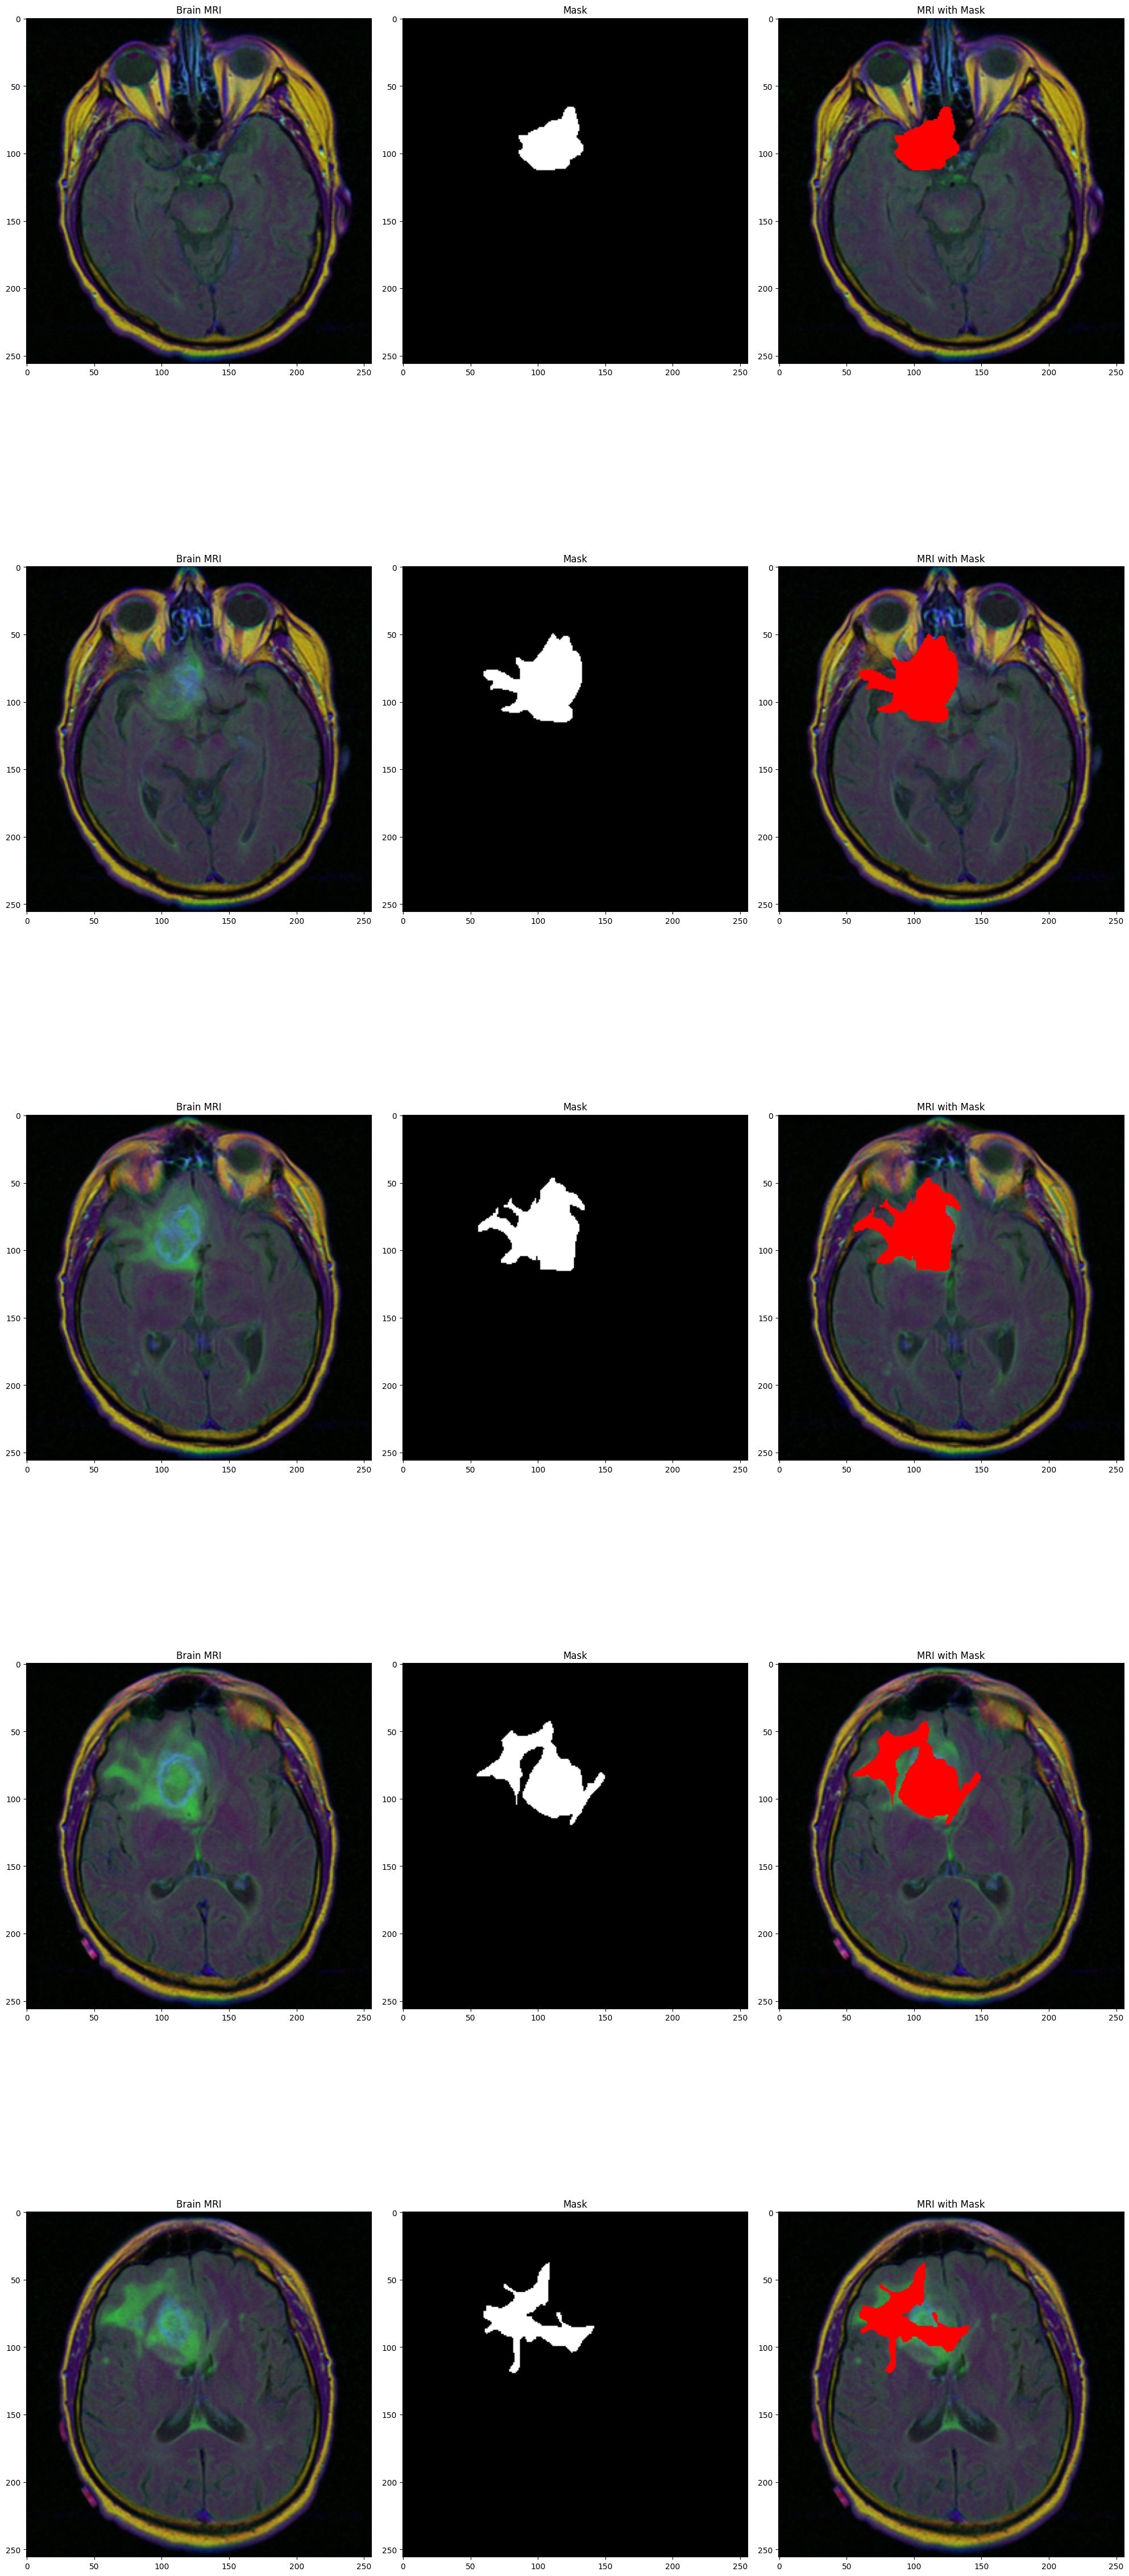

In [17]:
# Display 12 masked images
count = 0
fig, axs = plt.subplots(5, 3, figsize = (20,50))
for i in range(len(brain_df)):
    if brain_df['mask'][i] == 1 and count < 5:
        # Read masked color image & display
        img = io.imread(brain_df.image_path[i])
        axs[count][0].title.set_text('Brain MRI')
        axs[count][0].imshow(img)
        
        # Display mask in grayscale
        mask = io.imread(brain_df.mask_path[i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask, cmap = 'gray')
        
        # Replace white region with Red color over original MRI
        img[mask == 255] = (255, 0, 0)
        axs[count][2].title.set_text('MRI with Mask')
        axs[count][2].imshow(img)
        count+=1

fig.tight_layout()

In [18]:
brain_df_train = brain_df.drop(columns= ['patient_id'])
brain_df_train.shape

(3929, 3)

In [19]:
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x : str(x))
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(brain_df_train, test_size=0.15)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# Create a data generator which scales the imagedata from 0 to 1 and makes validation split for 15%
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.15)

In [23]:
train_generator = datagen.flow_from_dataframe(dataframe=train, directory = './', x_col = 'image_path', y_col = 'mask',
                                             subset = 'training', batch_size=16, shuffle=True, class_mode='categorical',
                                             target_size = (256,256))

Found 2839 validated image filenames belonging to 2 classes.


In [24]:
valid_generator = datagen.flow_from_dataframe(dataframe=train, directory = './', x_col = 'image_path', y_col = 'mask',
                                             subset = 'validation', batch_size=16, shuffle=True, class_mode='categorical',
                                             target_size = (256,256))

Found 500 validated image filenames belonging to 2 classes.


In [25]:
# Create a data generator which scales the data from 0 to 1
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
test_generator = datagen.flow_from_dataframe(dataframe = test, directory = './', x_col='image_path', y_col='mask',
                                              batch_size=16, shuffle=False, class_mode='categorical',
                                              target_size = (256,256))

Found 590 validated image filenames belonging to 2 classes.


In [27]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, AveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# import transfer learning model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Input

In [28]:
# load transfer of knowledge(weights) = imagenet, input shape = (256,256,3)
basemodel = ResNet50(weights = 'imagenet',include_top = False, input_tensor = Input(shape=(256,256,3)))

In [29]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [30]:
def build_model():
    basemodel = ResNet50(weights = 'imagenet',include_top = False, input_tensor = Input(shape=(256,256,3)))
    # Input layer
    model = Sequential()
    model.add(Conv2D(filters = 3, kernel_size = (3,3), padding = 'same', activation = 'relu',
                    input_shape = (256,256,3)))
    # add transfer learning
    model.add(basemodel)
    # average pooling layer
    model.add(AveragePooling2D())
    model.add(Flatten())
    # To avoid overfitting
    model.add(BatchNormalization())
    
    # Fully Connected Layer(FC)
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.3))
    # Multiclass Classification o/p neuron
    model.add(Dense(units = 2, activation = 'softmax'))
    
    # Learning Rate (alpha = (0.0001-1) & optimizers = Adam)
    adam_optimizer = Adam(learning_rate = 0.0001)
    
    # Loss - binary_crossentropy , classification_metrics = 'accuracy'
    model.compile(loss = 'categorical_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])
    
    return model

In [31]:
model = build_model()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 3)       84        
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 average_pooling2d (AverageP  (None, 4, 4, 2048)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 batch_normalization (BatchN  (None, 32768)            131072    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               8

In [33]:
# save best model 
from tensorflow.keras import callbacks
filepath = "C:/Users/dell/Downloads/Image/MRIResnet.hdf5"

In [34]:
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True,
                                       mode = 'min', verbose = 1)

In [35]:
checkpoint

In [38]:
#history = model.fit(train_generator, validation_data = valid_generator, epochs=30, 
#                              shuffle=True, callbacks=[checkpoint], verbose = 1)

Epoch 1/30
178/178 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.7467
Epoch 1: val_loss improved from inf to 2.52856, saving model to C:/Users/dell/Downloads/Image\MRIResnet.hdf5
178/178 [==============================] - 1066s 6s/step - loss: 0.6488 - accuracy: 0.7467 - val_loss: 2.5286 - val_accuracy: 0.6480
Epoch 2/30
178/178 [==============================] - ETA: 0s - loss: 0.4911 - accuracy: 0.8246
Epoch 2: val_loss did not improve from 2.52856
178/178 [==============================] - 1113s 6s/step - loss: 0.4911 - accuracy: 0.8246 - val_loss: 3.8873 - val_accuracy: 0.6480
Epoch 3/30
178/178 [==============================] - ETA: 0s - loss: 0.4675 - accuracy: 0.8330
Epoch 3: val_loss did not improve from 2.52856
178/178 [==============================] - 972s 5s/step - loss: 0.4675 - accuracy: 0.8330 - val_loss: 9.2314 - val_accuracy: 0.6480
Epoch 4/30
178/178 [==============================] - ETA: 0s - loss: 0.3088 - accuracy: 0.8816
Epoch 4: val_lo

Epoch 30/30
178/178 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9820
Epoch 30: val_loss did not improve from 0.60400
178/178 [==============================] - 829s 5s/step - loss: 0.0467 - accuracy: 0.9820 - val_loss: 1.1076 - val_accuracy: 0.8280


In [39]:
model.load_weights("C:/Users/dell/Downloads/Image/MRIResnet.hdf5")

In [40]:
model.evaluate(test_generator)

37/37 [==============================] - 48s 1s/step - loss: 0.3638 - accuracy: 0.8746


[0.3638089895248413, 0.8745762705802917]

In [41]:
y_pred = model.predict(test_generator)

37/37 [==============================] - 55s 1s/step


In [42]:
y_pred

array([[3.2679981e-01, 6.7320019e-01],
       [8.2849008e-01, 1.7150995e-01],
       [9.9942720e-01, 5.7273707e-04],
       ...,
       [1.0000000e+00, 3.4614595e-25],
       [1.0000000e+00, 4.3068711e-32],
       [6.8524134e-01, 3.1475869e-01]], dtype=float32)

In [43]:
y_hat = np.argmax(y_pred, axis = 1)

In [44]:
y_test = np.asarray(test['mask']).astype('int')

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_hat)

array([[360,  23],
       [ 51, 156]], dtype=int64)

<Axes: >

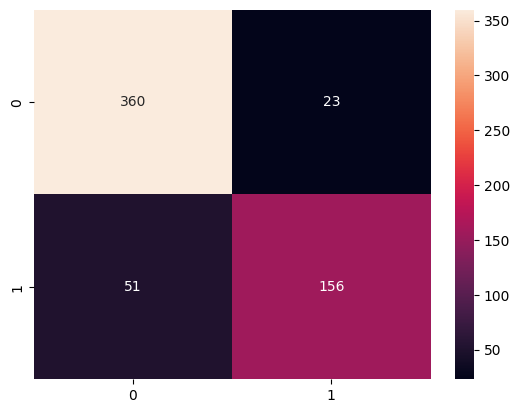

In [46]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True, fmt = '0.0f')

In [47]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       383
           1       0.87      0.75      0.81       207

    accuracy                           0.87       590
   macro avg       0.87      0.85      0.86       590
weighted avg       0.87      0.87      0.87       590



In [48]:
# Get the dataframe containing MRI which have masks associated
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(1373, 4)

In [49]:
# creating test, train and val sets
X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)
print("Train size is {}, valid size is {} & test size is {}".format(len(X_train), len(X_val), len(X_test)))

Train size is 1167, valid size is 103 & test size is 103


In [50]:
train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

In [51]:
val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

In [69]:
from skimage import io    # To read .tif image
from PIL import Image
import tensorflow as tf

In [70]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, ids , mask, image_dir = ' ', batch_size = 16, img_h = 256, img_w = 256, shuffle = True):
        self.ids = ids
        self.mask = mask
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.img_h = img_h
        self.img_w = img_w
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Get the number of batches per epoch'

        return int(np.floor(len(self.ids)) / self.batch_size)

    def __getitem__(self, index):
        'Generate a batch of data'

        #generate index of batch_size length
        indexes = self.indexes[index* self.batch_size : (index+1) * self.batch_size]

        #get the ImageId corresponding to the indexes created above based on batch size
        list_ids = [self.ids[i] for i in indexes]

        #get the MaskId corresponding to the indexes created above based on batch size
        list_mask = [self.mask[i] for i in indexes]


        #generate data for the X(features) and y(label)
        X, y = self.__data_generation(list_ids, list_mask)

        #returning the data
        return X, y

    def on_epoch_end(self):
        'Used for updating the indices after each epoch, once at the beginning as well as at the end of each epoch'

        #getting the array of indices based on the input dataframe
        self.indexes = np.arange(len(self.ids))

        #if shuffle is true, shuffle the indices
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_ids, list_mask):
        'generate the data corresponding the indexes in a given batch of images'

        # create empty arrays of shape (batch_size,height,width,depth) 
        #Depth is 3 for input and depth is taken as 1 for output becasue mask consist only of 1 channel.
        X = np.empty((self.batch_size, self.img_h, self.img_w, 3))
        y = np.empty((self.batch_size, self.img_h, self.img_w, 1))

    #iterate through the dataframe rows, whose size is equal to the batch_size
        for i in range(len(list_ids)):
            #path of the image
            img_path = str(list_ids[i])

            #mask path
            mask_path = str(list_mask[i])

            #reading the original image and the corresponding mask image
            img = io.imread(img_path)
            mask = io.imread(mask_path)

            #resizing and coverting them to array of type float64
            img = cv2.resize(img,(self.img_h,self.img_w))
            img = np.array(img, dtype = np.float64)

            mask = cv2.resize(mask,(self.img_h,self.img_w))
            mask = np.array(mask, dtype = np.float64)

            # standardizing 
            img -= img.mean()
            img /= img.std()

            mask -= mask.mean()
            mask /= mask.std()

            #Adding image to the empty array
            X[i,] = img

            #expanding the dimnesion of the image from (256,256) to (256,256,1)
            y[i,] = np.expand_dims(mask, axis = 2)

        #normalizing y
        y = (y > 0).astype(int)

        return X, y

In [71]:
train_data = DataGenerator(train_ids, train_mask)
val_data = DataGenerator(val_ids, val_mask)

In [72]:
from tensorflow.keras.models import Model, load_model 
from tensorflow.keras.layers import *

In [80]:
def resblock(X, f):
    # make a copy of Input
    X_copy = X
    # 'he_normal' It draw samples from truncated normal distribution centered on 0
    X = Conv2D(f, kernel_size = (1,1), strides = (1,1), kernel_initializer = 'he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer = 'he_normal')(X)
    X = BatchNormalization()(X)
    
    X_copy = Conv2D(f, kernel_size = (1,1), strides = (1,1), kernel_initializer = 'he_normal')(X_copy)
    X_copy = BatchNormalization()(X_copy)
    
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

In [81]:
def upsample_concat(x, skip):
    x = UpSampling2D((2,2))(x)
    merge = Concatenate()([x, skip])
    
    return merge

In [82]:
input_shape = (256,256,3)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale Stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale Stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale Stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale Stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding='same', activation = 'sigmoid')(up_4)

model_seg = Model(inputs = X_input, outputs = output)

In [83]:
model_seg.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 256, 256, 16  448         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 256, 256, 16  64         ['conv2d_15[0][0]']              
 ormalization)                  )                                                             

 conv2d_25 (Conv2D)             (None, 32, 32, 128)  8320        ['max_pooling2d_7[0][0]']        
                                                                                                  
 batch_normalization_24 (BatchN  (None, 32, 32, 128)  512        ['conv2d_24[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_25 (BatchN  (None, 32, 32, 128)  512        ['conv2d_25[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_2 (Add)                    (None, 32, 32, 128)  0           ['batch_normalization_24[0][0]', 
                                                                  'batch_normalization_25[0][0]'] 
          

 batch_normalization_34 (BatchN  (None, 64, 64, 64)  256         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_5 (Add)                    (None, 64, 64, 64)   0           ['batch_normalization_33[0][0]', 
                                                                  'batch_normalization_34[0][0]'] 
                                                                                                  
 activation_11 (Activation)     (None, 64, 64, 64)   0           ['add_5[0][0]']                  
                                                                                                  
 up_sampling2d_2 (UpSampling2D)  (None, 128, 128, 64  0          ['activation_11[0][0]']          
                                )                                                                 
          

In [84]:
# Define a custom loss function for ResUNet model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K

epsilon = 1e-5
smooth = 1

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)


In [85]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon= 0.1)
model_seg.compile(optimizer = adam,
                 loss = focal_tversky,
                 metrics = [tversky]
                 )

In [86]:
# Callbacks
# save best model 
from tensorflow.keras import callbacks
filepath = "C:/Users/dell/Downloads/Image/ResUnet.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True,
                                       mode = 'min', verbose = 1)
checkpoint

In [87]:
history = model_seg.fit(train_data, epochs = 60, 
                        validation_data = val_data, 
                        shuffle=True, callbacks=[checkpoint], verbose = 1)

Epoch 1/60
72/72 [==============================] - ETA: 0s - loss: 0.9008 - tversky: 0.1299
Epoch 1: val_loss improved from inf to 0.91854, saving model to C:/Users/dell/Downloads/Image\ResUnet.hdf5
72/72 [==============================] - 207s 3s/step - loss: 0.9008 - tversky: 0.1299 - val_loss: 0.9185 - val_tversky: 0.1071
Epoch 2/60
72/72 [==============================] - ETA: 0s - loss: 0.8161 - tversky: 0.2362
Epoch 2: val_loss improved from 0.91854 to 0.75010, saving model to C:/Users/dell/Downloads/Image\ResUnet.hdf5
72/72 [==============================] - 238s 3s/step - loss: 0.8161 - tversky: 0.2362 - val_loss: 0.7501 - val_tversky: 0.3177
Epoch 3/60
72/72 [==============================] - ETA: 0s - loss: 0.5641 - tversky: 0.5299
Epoch 3: val_loss did not improve from 0.75010
72/72 [==============================] - 243s 3s/step - loss: 0.5641 - tversky: 0.5299 - val_loss: 0.8158 - val_tversky: 0.2368
Epoch 4/60
72/72 [==============================] - ETA: 0s - loss: 0.48

72/72 [==============================] - ETA: 0s - loss: 0.2431 - tversky: 0.8466
Epoch 29: val_loss did not improve from 0.33348
72/72 [==============================] - 253s 4s/step - loss: 0.2431 - tversky: 0.8466 - val_loss: 0.3420 - val_tversky: 0.7567
Epoch 30/60
72/72 [==============================] - ETA: 0s - loss: 0.2323 - tversky: 0.8558
Epoch 30: val_loss did not improve from 0.33348
72/72 [==============================] - 283s 4s/step - loss: 0.2323 - tversky: 0.8558 - val_loss: 0.4117 - val_tversky: 0.6900
Epoch 31/60
72/72 [==============================] - ETA: 0s - loss: 0.2300 - tversky: 0.8579
Epoch 31: val_loss did not improve from 0.33348
72/72 [==============================] - 262s 4s/step - loss: 0.2300 - tversky: 0.8579 - val_loss: 0.3537 - val_tversky: 0.7485
Epoch 32/60
72/72 [==============================] - ETA: 0s - loss: 0.2257 - tversky: 0.8612
Epoch 32: val_loss did not improve from 0.33348
72/72 [==============================] - 232s 3s/step - loss

Epoch 59/60
72/72 [==============================] - ETA: 0s - loss: 0.1331 - tversky: 0.9315
Epoch 59: val_loss did not improve from 0.30421
72/72 [==============================] - 209s 3s/step - loss: 0.1331 - tversky: 0.9315 - val_loss: 0.3305 - val_tversky: 0.7699
Epoch 60/60
72/72 [==============================] - ETA: 0s - loss: 0.1305 - tversky: 0.9334
Epoch 60: val_loss did not improve from 0.30421
72/72 [==============================] - 206s 3s/step - loss: 0.1305 - tversky: 0.9334 - val_loss: 0.3474 - val_tversky: 0.7519


In [88]:
img_new = cv2.imread("C:/Users/dell/Downloads/Image/ResUnet.hdf5')

ValueError: Layer count mismatch when loading weights from file. Model expected 6 layers, found 53 saved layers.